In [ ]:
!pip install -q rasterio

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)

In [ ]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from matplotlib import colors

In [ ]:
# Leitura dos arquivos
src1 = rio.open('/content/drive/MyDrive/Dados_PDI/subset_0_of_L15-0635E-1001N_3sept17_n_unmixed.tif')
antes = src1.read(1)

src2 = rio.open('/content/drive/MyDrive/Dados_PDI/subset_1_of_L15-0635E-1001N_12sept23_n_unmixed.tif')
depois = src2.read(1)

# Metadados
meta = src1.profile

In [ ]:
antes.shape

(4096, 4096)

In [ ]:
# Calculando diferença pixel-wise
diff = depois - antes

In [ ]:
# Calculando diferença (com loop)
row, col = antes.shape
diff_b = np.zeros((row, col), dtype=np.float32)

In [ ]:
diff_b.min()

0.0

In [ ]:
# Calculando diferença (com loop)
row, col = antes.shape
diff_b = np.zeros((row, col), dtype=np.float32)

# Loop pelas coordenadas dos pixels
for y in range(col):
    for x in range(row):
        depois_pixel = depois[x, y]
        antes_pixel = antes[x, y]

        # Calcule a diferença para o pixel
        diff_pixel = depois_pixel - antes_pixel

        diff_b[x, y] = diff_pixel

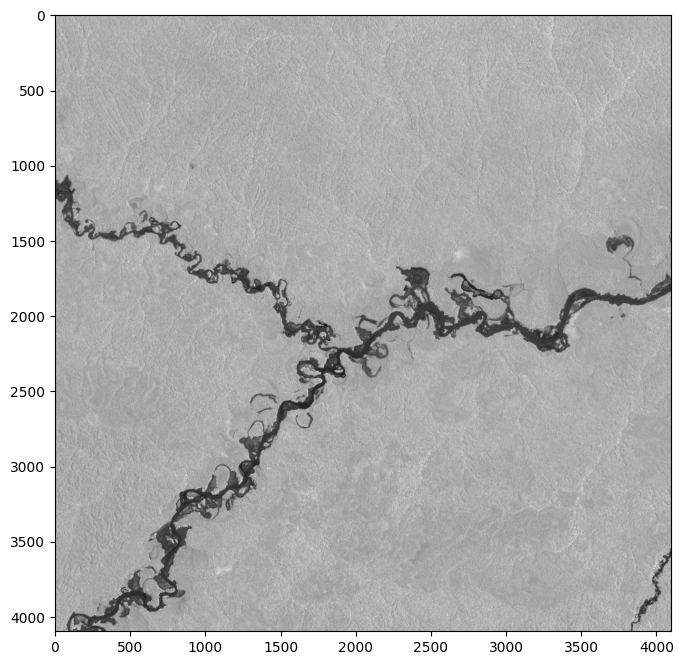

In [ ]:
plt.imshow(depois, cmap='gray')

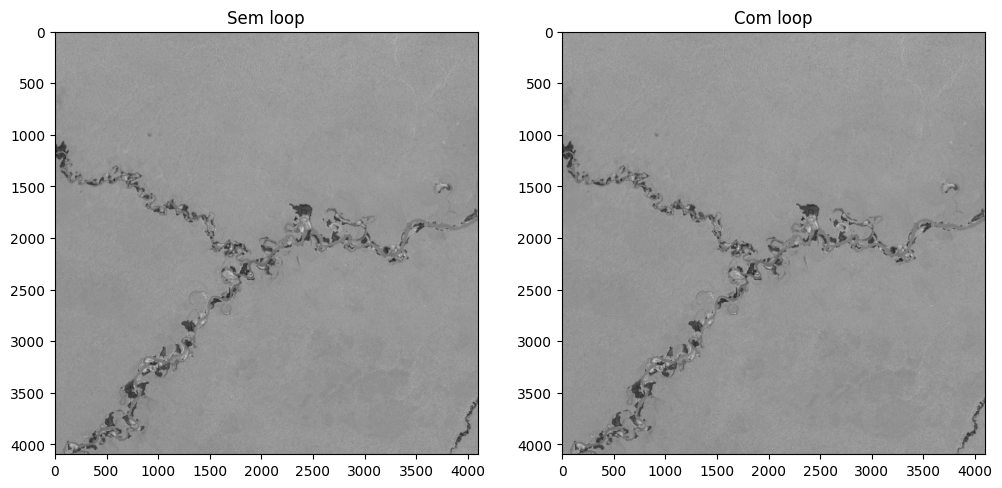

In [ ]:
# Visualizando imagens
fig,ax = plt.subplots(1,2)

ax[0].imshow(diff, cmap='gray')
ax[0].set_title('Sem loop')
ax[1].imshow(diff_b, cmap='gray')
ax[1].set_title('Com loop')
plt.show()

In [ ]:
# Estatísticas
print("Mínimo: ", np.min(diff))
print("Máximo: ", np.max(diff))
print("Média: ", np.mean(diff))
print("Mediana: ", np.median(diff))
print("Desvio: ", np.std(diff))
print("Variância: ", np.var(diff))

Mínimo:  -1.409934
Máximo:  1.0644834
Média:  0.02481466
Mediana:  0.041047752
Desvio:  0.13753171
Variância:  0.018914973


In [ ]:
# Calculando limiares
dois_desvios_neg = np.mean(diff) - 2 * np.std(diff)
dois_desvios_pos = np.mean(diff) + 2 * np.std(diff)

In [ ]:
print(dois_desvios_neg)

-0.25024876557290554


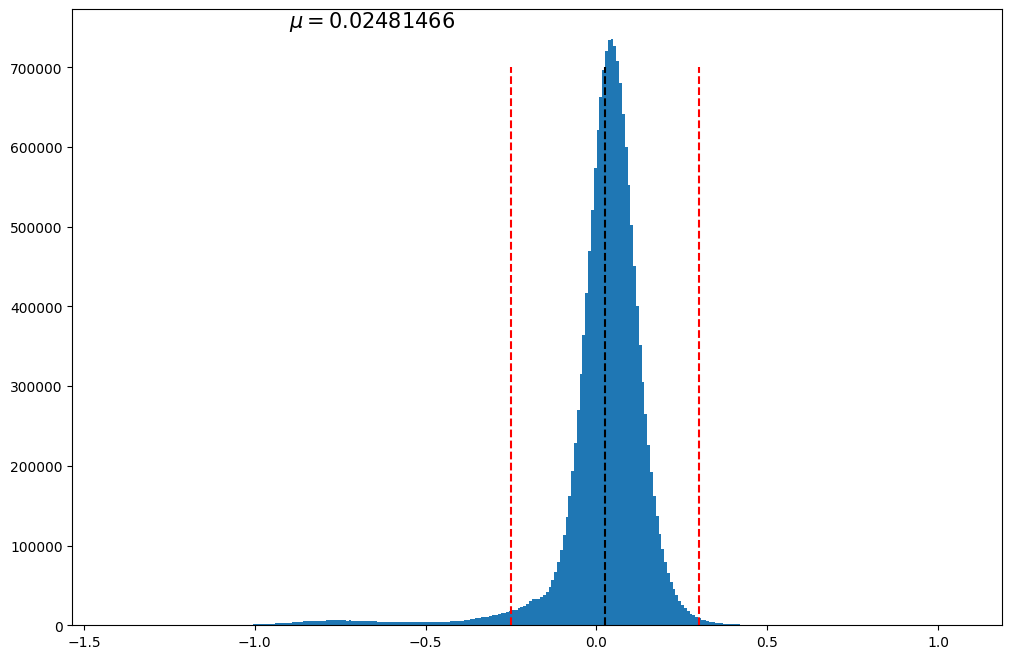

In [ ]:
# Visualização do histograma
plt.hist(diff.flatten(), bins=300)
plt.text(-0.9, 750000, r'$\mu = 0.02481466$', fontsize=15)
plt.vlines([dois_desvios_neg, dois_desvios_pos], 0, 700000, linestyles='dashed', colors='red')
plt.vlines([np.mean(diff)], 0, 700000, linestyles='dashed', colors='black')
plt.show()

In [ ]:
bounds

[-1.409934, -0.25024876557290554, 0.02481466, 0.29987808503210545, 1.0644834]

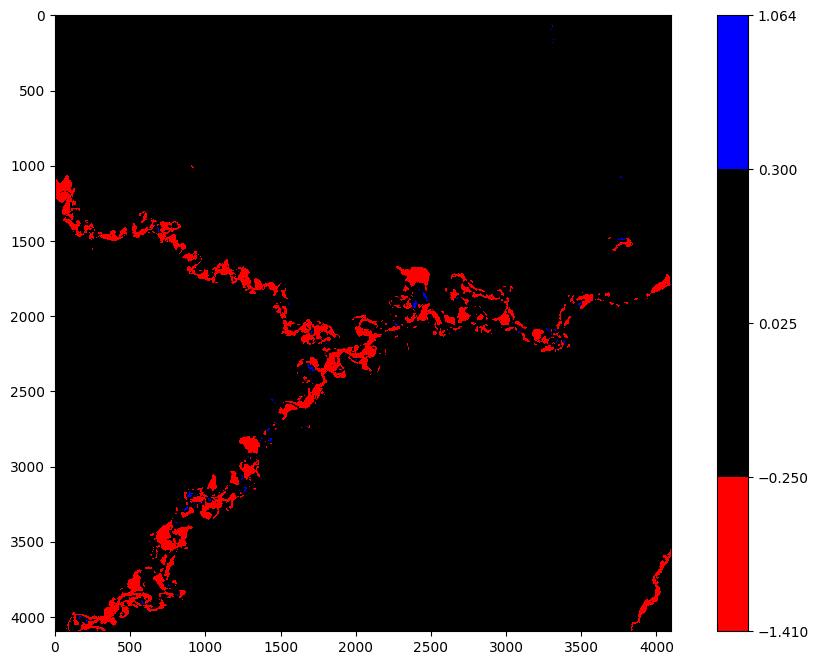

In [ ]:
# Visualizando resultados
cmap = colors.ListedColormap(['red', 'black','black','blue'])

bounds=[np.min(diff),dois_desvios_neg,np.mean(diff),dois_desvios_pos,np.max(diff)]

norm = colors.BoundaryNorm(bounds, cmap.N)

img = plt.imshow(diff,cmap=cmap, norm=norm)

plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds)

In [ ]:
meta

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 4096, 'height': 4096, 'count': 1, 'crs': CRS.from_epsg(3857), 'transform': Affine(4.777314282226598, 0.0, -7611905.0237,
       0.0, -4.7773142822265555, -430493.3432), 'blockxsize': 4096, 'blockysize': 4096, 'tiled': True, 'interleave': 'band'}

In [ ]:
# Gravando em disco
with rio.open('diff.tif', 'w', **meta) as src:
  src.write(diff,1)

In [ ]:
! mv /content/diff.tif /content/drive/MyDrive/Dados_PDI